<a href="https://colab.research.google.com/github/surbhi0901/MLnow_2.0/blob/main/3_1_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA and Univariate linear regression

###**Problem Statement**: Predict the marks of student in different subjects based on various factors.
[Link to download the dataset](https://www.kaggle.com/spscientist/students-performance-in-exams?select=StudentsPerformance.csv)

**Date created**: 09/06/2021

**Author**: [Surbhi Singh]

**Reach Out**: [Github](https://github.com/surbhi0901)  [Linkedin](https://www.linkedin.com/in/surbhi-singh-0901/) [Email](mailto:surbhi.singh0901@gmail.com)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd '/content/drive/MyDrive/LiveCodeSession'

/content/drive/MyDrive/LiveCodeSession


In [5]:
ls

EDA/  PerceptronTraining.ipynb  StudentsPerformance.csv  univariate.csv


###Importing the required libraries:

In [6]:
import os
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language
import seaborn as sns
import matplotlib.pyplot as plt # for visual analysis of the dataset


Load the dataset and store it into a variable named data

In [7]:
a=pd.read_csv('StudentsPerformance.csv')
a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Performing EDA of the dataset:

In [8]:
#Checking for null values, if present in the data.
a.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

###The data does not contain any null value, so we are good to go!!!

In [9]:
# Enlist the columns and its datatypes
a.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
a.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
# Renaming the columns
a.columns=['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score']
a.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# Using describe function to list out some basic statistical information about continuous data
a.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
a.shape

(1000, 8)

####The dataset has 8 columns and 1000 rows

## Some visualizations of the given data:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


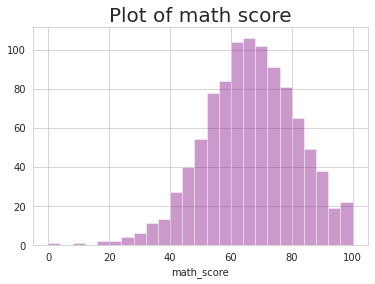

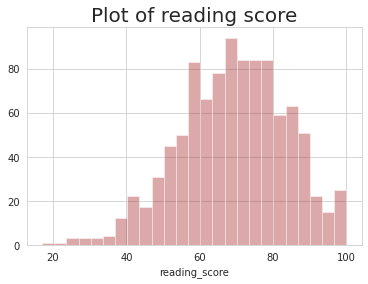

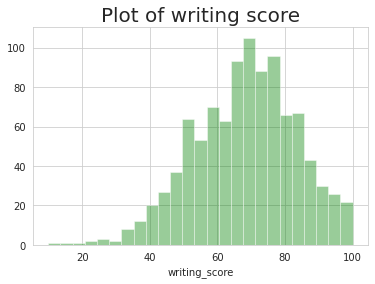

In [14]:
sns.set_style('whitegrid')
sns.distplot(a['math_score'],hist=True,color='purple',bins=25,kde=False)
plt.title('Plot of math score',fontsize=20)
plt.show()
print()
sns.distplot(a['reading_score'],color='brown',bins=25,kde=False)
plt.title('Plot of reading score',fontsize=20)
plt.show()
print()
sns.distplot(a['writing_score'],color='green',bins=25,kde=False)
plt.title('Plot of writing score',fontsize=20)
plt.show()

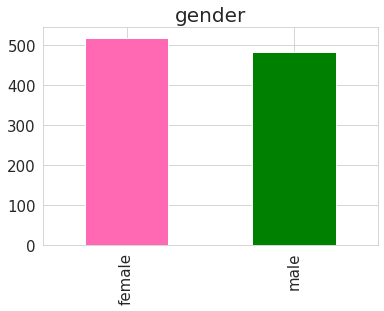

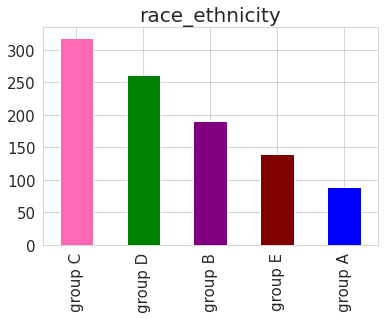

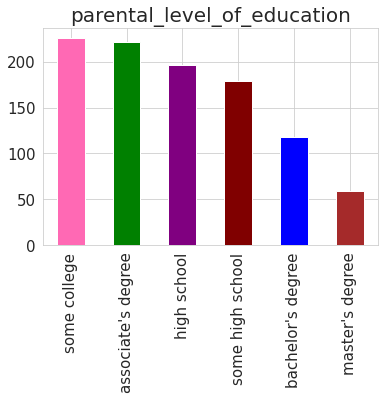

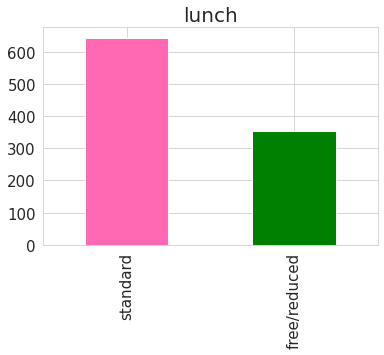

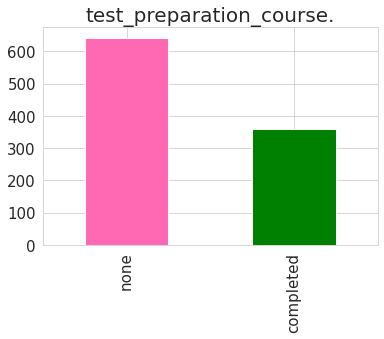

In [15]:
colors=['hotpink','green','purple','maroon','blue','brown','yellow']
a.gender.value_counts().plot(kind='bar',color=colors,fontsize=15)
plt.title('gender',fontsize=20)
plt.show()
a.race_ethnicity.value_counts().plot(kind='bar',color=colors,fontsize=15)
plt.title('race_ethnicity',fontsize=20)
plt.show()
a.parental_level_of_education.value_counts().plot(kind='bar',color=colors,fontsize=15)
plt.title('parental_level_of_education',fontsize=20)
plt.show()
a.lunch.value_counts().plot(kind='bar',color=colors,fontsize=15)
plt.title('lunch',fontsize=20)
plt.show()
a.test_preparation_course.value_counts().plot(kind='bar',color=colors,fontsize=15)
plt.title('test_preparation_course.',fontsize=20)
plt.show()

####From the above visualization we conclude that:

*The data set contains more females than males.*

*Race is unevenly distributed, with group C having maximum number of people and group A at least.*

*Most of the students have access to standard lunch*

*A less fraction of students have taken test preparation course.*


## Now we will count the number of students who score more than average marks in each subject:

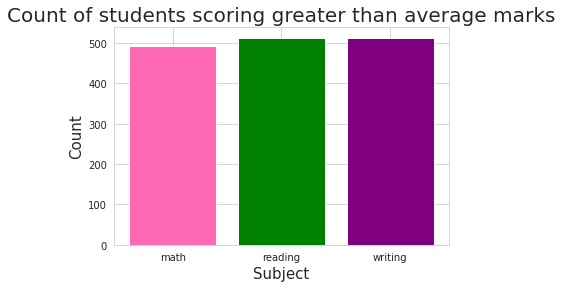

In [16]:
# m1,r1 and w1 are the count of students who score greater than average marks in math, reading and writing respitevely
m1=a[a.math_score>=a.math_score.mean()]['math_score'].count()
r1=a[a.reading_score>=a.reading_score.mean()]['reading_score'].count()
w1=a[a.writing_score>=a.writing_score.mean()]['writing_score'].count()
m=['math','reading','writing']
l=[m1,r1,w1]
plt.bar(m,l,color=colors)
plt.xlabel('Subject',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Count of students scoring greater than average marks',fontsize=20)
plt.show()

##Let us plot the distribution of number of students scoring marks above average marks.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


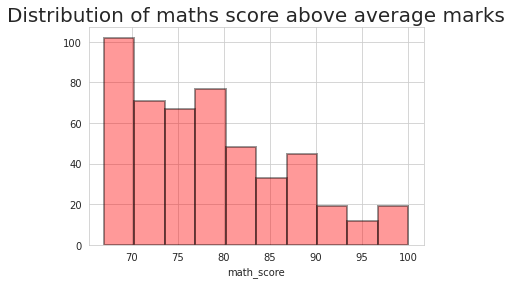

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


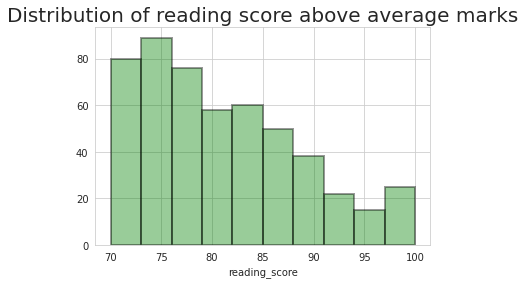

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


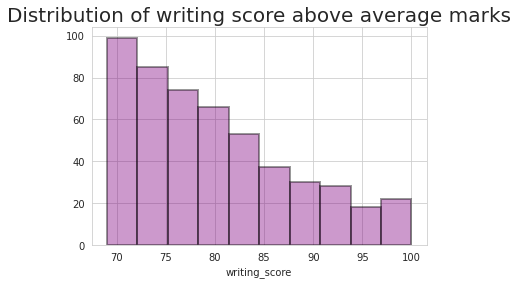

In [17]:
sns.distplot(a[a.math_score>=a.math_score.mean()]['math_score'],hist=True,kde=False,bins=10,hist_kws=dict(edgecolor="black", linewidth=2,color='red'))
plt.title('Distribution of maths score above average marks',fontsize=20)
plt.show()
sns.distplot(a[a.reading_score>=a.reading_score.mean()]['reading_score'],hist=True,kde=False,bins=10,hist_kws=dict(edgecolor="black", linewidth=2,color='green'))
plt.title('Distribution of reading score above average marks',fontsize=20)
plt.show()
sns.distplot(a[a.writing_score>=a.writing_score.mean()]['writing_score'],hist=True,kde=False,bins=10,hist_kws=dict(edgecolor="black", linewidth=2,color='purple'))
plt.title('Distribution of writing score above average marks',fontsize=20)
plt.show()

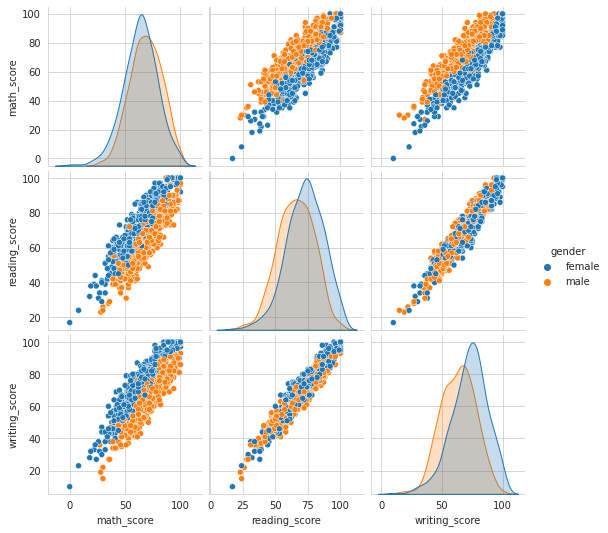

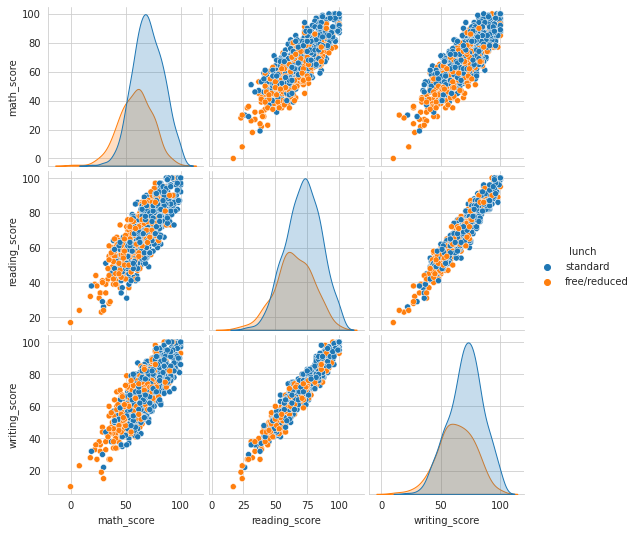

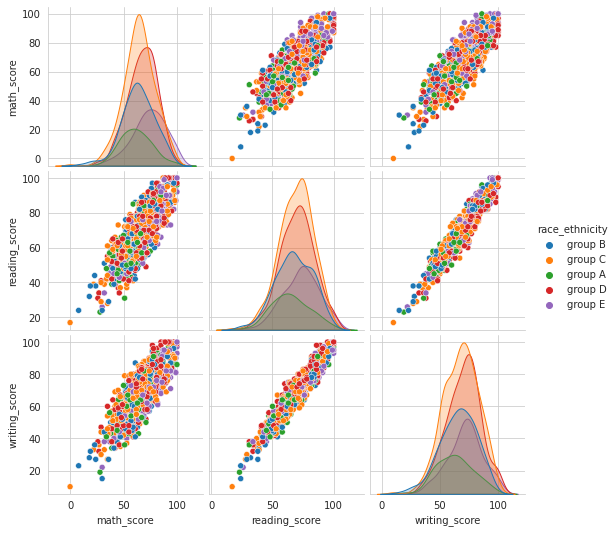

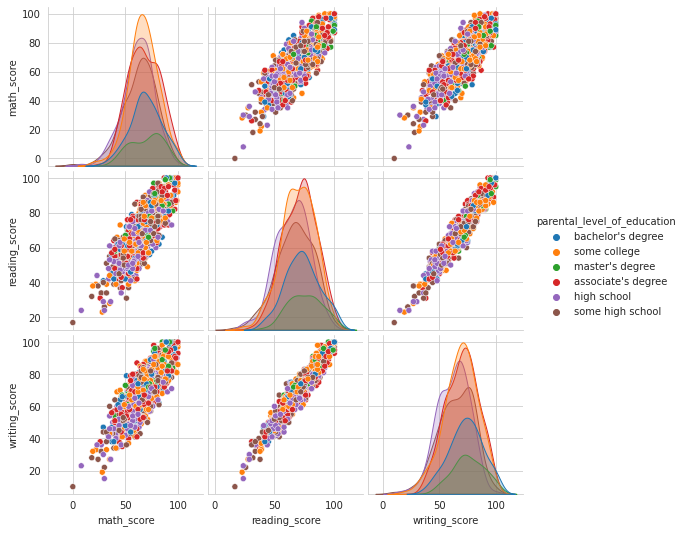

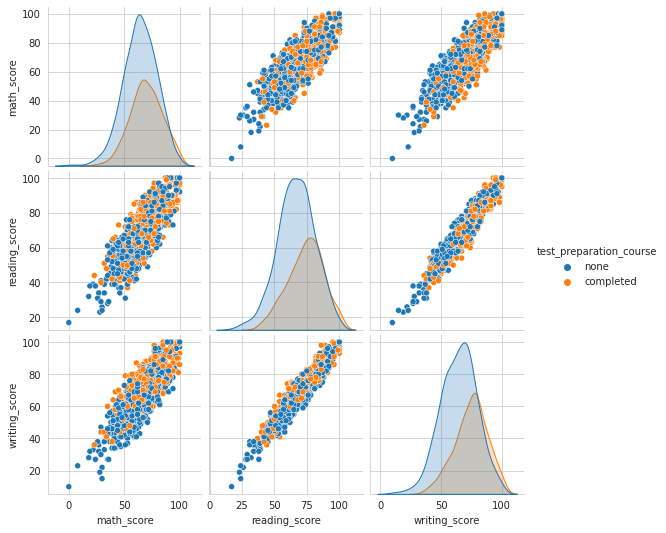

In [18]:
sns.pairplot(a,hue='gender')
plt.show()
print()
sns.pairplot(a,hue='lunch')
plt.show()
print()
sns.pairplot(a,hue='race_ethnicity')
plt.show()
print()
sns.pairplot(a,hue='parental_level_of_education')
plt.show()
print()
sns.pairplot(a,hue='test_preparation_course')
plt.show()

## Dependency of marks on categorical features:

###1)GENDER:

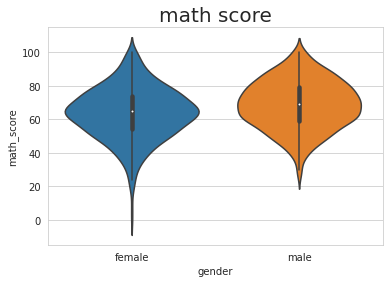

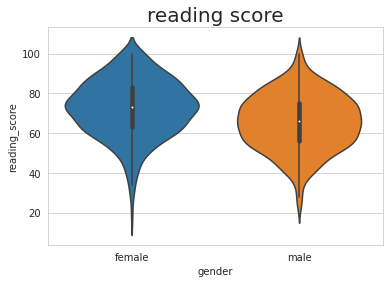

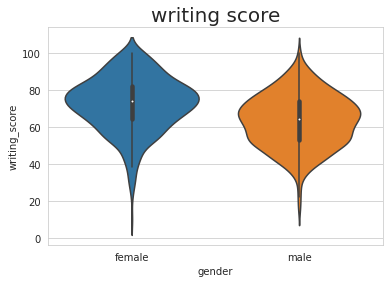

In [19]:
sns.violinplot(data=a,x='gender',y='math_score')
plt.title('math score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='gender',y='reading_score')
plt.title('reading score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='gender',y='writing_score')
plt.title('writing score',fontsize=20)
plt.show()

###2)TYPE OF LUNCH

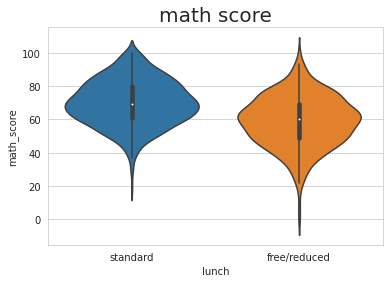

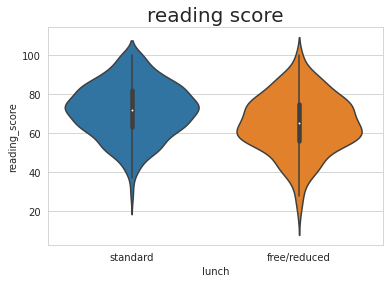

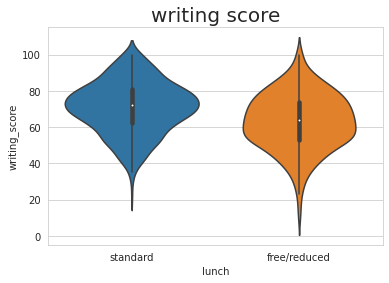

In [20]:
sns.violinplot(data=a,x='lunch',y='math_score')
plt.title('math score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='lunch',y='reading_score')
plt.title('reading score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='lunch',y='writing_score')
plt.title('writing score',fontsize=20)
plt.show()

###3)PARENTAL LEVEL OF EDUCATION

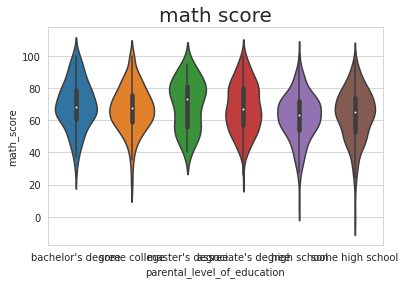

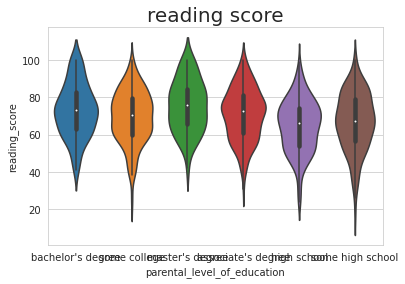

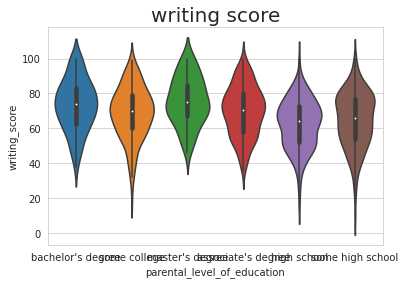

In [21]:
sns.violinplot(data=a,x='parental_level_of_education',y='math_score')
plt.title('math score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='parental_level_of_education',y='reading_score')
plt.title('reading score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='parental_level_of_education',y='writing_score')
plt.title('writing score',fontsize=20)
plt.show()

###4)TEST PREPARATION COURSE

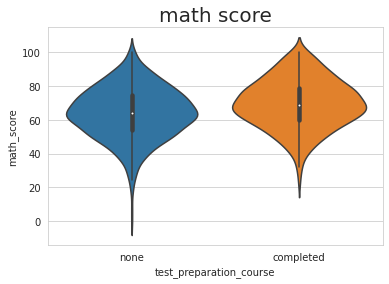

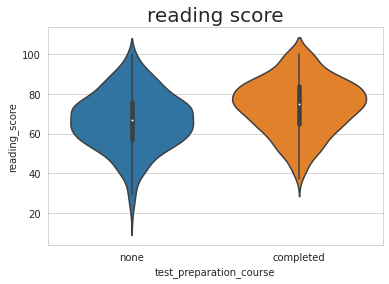

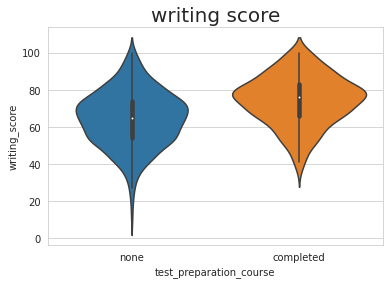

In [22]:
sns.violinplot(data=a,x='test_preparation_course',y='math_score')
plt.title('math score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='test_preparation_course',y='reading_score')
plt.title('reading score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='test_preparation_course',y='writing_score')
plt.title('writing score',fontsize=20)
plt.show()

###5)RACE

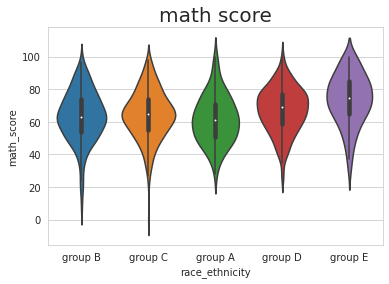

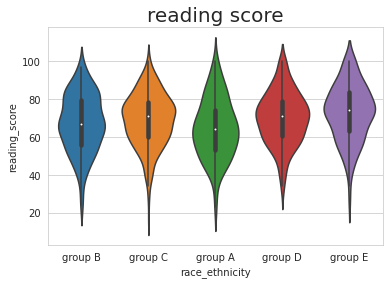

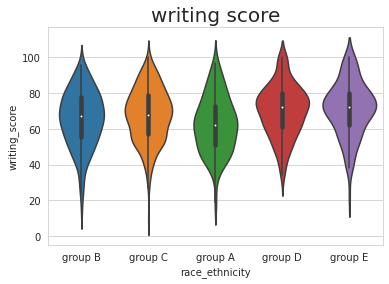

In [23]:
sns.violinplot(data=a,x='race_ethnicity',y='math_score')
plt.title('math score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='race_ethnicity',y='reading_score')
plt.title('reading score',fontsize=20)
plt.show()
sns.violinplot(data=a,x='race_ethnicity',y='writing_score')
plt.title('writing score',fontsize=20)
plt.show()

### Now let us define the passing marks as 45 and analyze the number of passing and failing students in each subject:

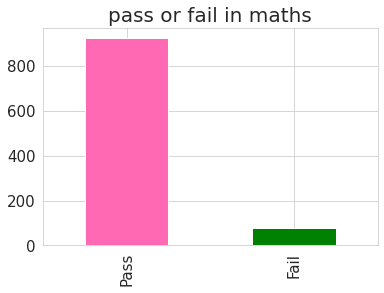

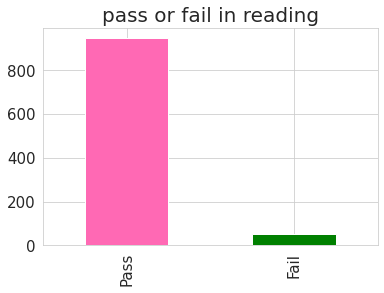

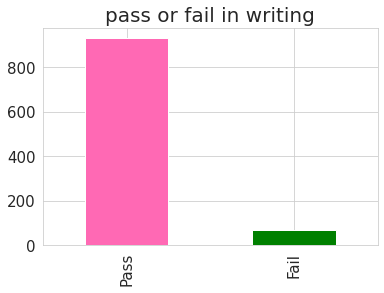

In [24]:
passm=45
a['pass_math'] = np.where(a['math_score']< passm, 'Fail', 'Pass')
a['pass_math'].value_counts().plot.bar(color = colors,fontsize=15)
plt.title('pass or fail in maths',fontsize=20)
plt.show()
a['pass_reading'] = np.where(a['reading_score']< passm, 'Fail', 'Pass')
a['pass_reading'].value_counts().plot.bar(color = colors,fontsize=15)
plt.title('pass or fail in reading',fontsize=20)
plt.show()
a['pass_writing'] = np.where(a['writing_score']< passm, 'Fail', 'Pass')
a['pass_writing'].value_counts().plot.bar(color = colors,fontsize=15)
plt.title('pass or fail in writing',fontsize=20)
plt.show()

##NOW WE WILL GROUP THE MARKS IN CATEGIRIES:OUTSTANDING, EXCELLENT, VERY GOOD,GOOD, AVERAGE AND BELOW AVERAGE:

In [25]:
# Defining a new column named "average" and use it to provide grades.
a['average']=(a['math_score']+a["reading_score"]+a["writing_score"])/3

#defining a function to categorize into grades.

def grade(avg):
  if(avg>=90):
    return "OUTSTANDING"
  if(avg >= 80):
    return 'EXCELLENT'
  if(avg >= 70):
    return 'VERY GOOD'
  if(avg >= 60):
    return 'GOOD'
  if(avg >= 40):
    return 'AVERAGE'
  else :
    return 'BELOW AVERAGE'
a['performance'] = a.apply(lambda x: grade(x['average']), axis = 1 )
a['performance'].value_counts()


VERY GOOD        261
GOOD             256
AVERAGE          255
EXCELLENT        146
OUTSTANDING       52
BELOW AVERAGE     30
Name: performance, dtype: int64

Text(0.5, 1.0, 'Plot of Grades of students')

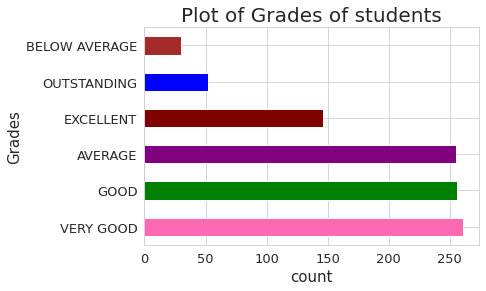

In [26]:
a['performance'].value_counts().plot(kind='barh',color=colors,fontsize=13)
plt.xlabel('count',fontsize=15)
plt.ylabel('Grades',fontsize=15)
plt.title('Plot of Grades of students',fontsize=20)

#Univariate linear regression

###For univariate, we will consider a variable reading_score and the target variable as math score

In [27]:
#Define dataset containing just two columns:
unidata=a[['reading_score','math_score']]
unidata.head(10)

,reading_score,math_score
0,72,72
1,90,69
2,95,90
3,57,47
4,78,76
5,83,71
6,95,88
7,43,40
8,64,64
9,60,38


In [28]:
unidata.to_csv('univariate.csv')

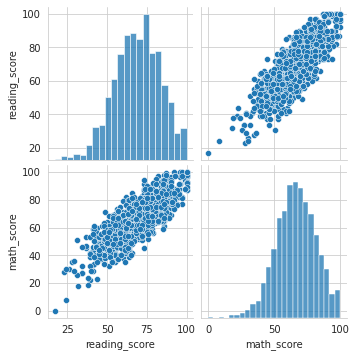

In [29]:
sns.pairplot(unidata)

Splitting the data into 80% training and 20% testing:

In [30]:
train=unidata.sample(frac=0.8, random_state=0)
test=unidata.drop(train.index)
print(train.head())
print(f'The shape of train dataset is:{train.shape}')
print(test.head())
print(f'The shape of test dataset is:{test.shape}')


     reading_score  math_score
993             72          62
859             73          87
298             46          40
553             62          77
672             78          69
The shape of train dataset is:(800, 2)
    reading_score  math_score
9              60          38
11             52          40
19             58          54
23             73          69
28             70          70
The shape of test dataset is:(200, 2)


###We will polt the scatterplot to check if there is a linear relationship between math score and reading score

Text(0.5, 1.0, 'linear relationship between reading_score and math_score')

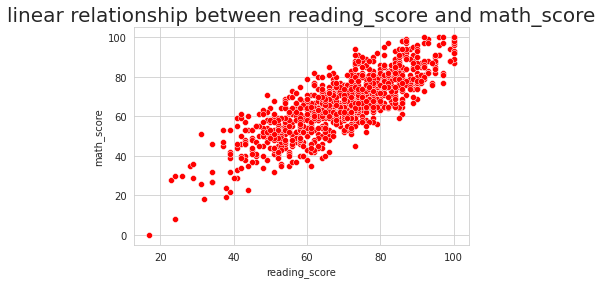

In [39]:
sns.scatterplot(x=unidata.reading_score,y=unidata.math_score,color='red')
plt.title("linear relationship between reading_score and math_score",fontsize=20)

***The datapoints are quite scattered, but still we can try training it on linear regression***

In [57]:
# Copy the train and test dataset into trainFeatures and testFeatures and extract labels(math_score) from it.
trainFeatures=train.copy()
testFeatures=test.copy()
print(trainFeatures.head())
print(testFeatures.head())

     reading_score  math_score
993             72          62
859             73          87
298             46          40
553             62          77
672             78          69
    reading_score  math_score
9              60          38
11             52          40
19             58          54
23             73          69
28             70          70


In [58]:
#Now, remove math_score column and save it into trainLabels and testLabels
trainLabels=trainFeatures.pop('math_score')
testLabels=testFeatures.pop('math_score')

In [62]:
print(f'''Train labels head:
{trainLabels.head()}
Train features head:
{trainFeatures.head()}
Test labels head:
{testLabels.head()}
Test features head:
{testFeatures.head()}''')

Train labels head:
993    62
859    87
298    40
553    77
672    69
Name: math_score, dtype: int64
Train features head:
     reading_score
993             72
859             73
298             46
553             62
672             78
Test labels head:
9     38
11    40
19    54
23    69
28    70
Name: math_score, dtype: int64
Test features head:
    reading_score
9              60
11             52
19             58
23             73
28             70


In [63]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [64]:
model.compile(loss='mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['mae','mse'])

In [67]:
numEpochs = 5000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
25/25 [==============================] - 0s 2ms/step - loss: 7.1132 - mae: 7.1132 - mse: 76.6938 - val_loss: 6.8332 - val_mae: 6.8332 - val_mse: 74.1155
Epoch 2502/5000
25/25 [==============================] - 0s 3ms/step - loss: 7.1190 - mae: 7.1190 - mse: 76.7240 - val_loss: 6.8389 - val_mae: 6.8389 - val_mse: 74.1707
Epoch 2503/5000
25/25 [==============================] - 0s 3ms/step - loss: 7.1183 - mae: 7.1183 - mse: 76.8452 - val_loss: 6.8313 - val_mae: 6.8313 - val_mse: 74.1047
Epoch 2504/5000
25/25 [==============================] - 0s 3ms/step - loss: 7.1141 - mae: 7.1141 - mse: 76.7246 - val_loss: 6.8363 - val_mae: 6.8363 - val_mse: 74.1424
Epoch 2505/5000
25/25 [==============================] - 0s 2ms/step - loss: 7.1125 - mae: 7.1125 - mse: 76.7066 - val_loss: 6.8326 - val_mae: 6.8326 - val_mse: 74.1122
Epoch 2506/5000
25/25 [==============================] - 0s 2ms/step - loss: 7.1151 - mae: 7.1151 - mse:

In [68]:
print(history)

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


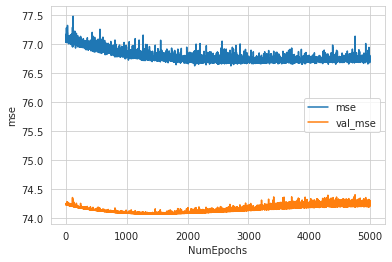

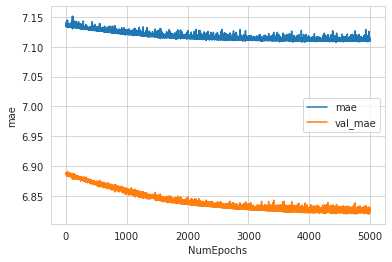

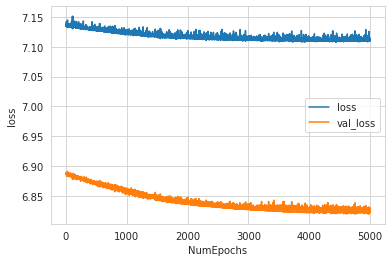

In [70]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [71]:
model.predict([78])

array([[73.55768]], dtype=float32)

In [73]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 78: {model.predict([78])}')


# for a list of values
tempListforPreds = [72,76,95,57,84]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 78: [[73.55768]]


input List = [72, 76, 95, 57, 84]


List of Predictions:
[[68.53845 ]
 [71.884605]
 [87.77883 ]
 [55.990376]
 [78.576904]]

List of Predictions (flattened out):
[68.53845  71.884605 87.77883  55.990376 78.576904]



In [72]:
print(testFeatures)

     reading_score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [76]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values
print(len(testPreds))
print(testPreds)

200
[58.49999  51.807682 56.826912 69.374985 66.86537  68.53845  76.06729
 69.374985 56.826912 62.68268  67.70191  73.55768  54.3173   57.663452
 61.009605 50.971146 49.29807  47.624992 40.932686 77.74037  67.70191
 36.749996 80.249985 76.06729  64.35576  64.35576  72.72114  66.02883
 55.990376 76.90383  78.576904 39.25961  59.33653  44.27884  65.1923
 71.048065 64.35576  66.86537  71.048065 50.971146 72.72114  65.1923
 50.134605 66.02883  51.807682 61.84614  55.153835 76.06729  66.02883
 59.33653  68.53845  50.134605 70.211525 61.84614  69.374985 72.72114
 74.39422  43.4423   71.884605 66.86537  73.55768  61.009605 51.807682
 76.90383  71.048065 69.374985 58.49999  42.605762 64.35576  51.807682
 61.84614  80.249985 52.644222 46.788452 71.048065 65.1923   83.59614
 61.84614  72.72114  69.374985 89.451904 87.77883  49.29807  73.55768
 61.84614  64.35576  61.009605 67.70191  77.74037  79.413445 63.51922
 68.53845  69.374985 76.90383  46.788452 79.413445 62.68268  53.48076
 80.249985 47.6

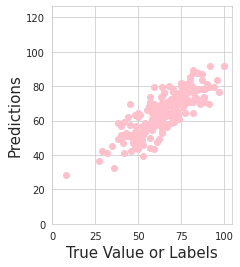

In [80]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions,color='pink')
  plt.ylabel('Predictions',fontsize=15)
  plt.xlabel('True Value or Labels',fontsize=15)
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

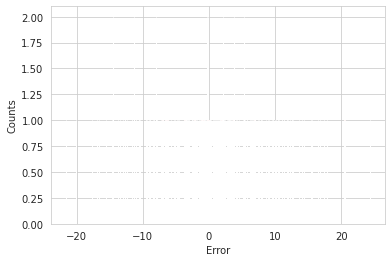

In [79]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts,color='red')
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)